## 预处理

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from collections import defaultdict
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# %config InlineBackend.figure_format = 'svg'
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
%matplotlib notebook
%matplotlib notebook

In [3]:
# nbaData = pd.read_csv('./data/nba/nba.csv')
# nbaData.head()

In [4]:
# lionData = pd.read_csv('./data/lion-reference.csv',header=None)
# lionData.head()

In [5]:
# cactusData = pd.read_csv('./data/Cactus.txt',header=None,sep='\t')
# cactusData.head()

In [6]:
catData = pd.read_csv('./data/cat-reference.csv',header=None)
catData.head()

,0,1,2
0,0.013579,0.215377,-0.170891
1,0.010493,0.226649,-0.173601
2,0.020415,0.230665,-0.175927
3,0.060064,0.241075,-0.140388
4,0.057849,0.251924,-0.140969


寻找一种好的降维方法，正交化？

In [7]:
data = catData

In [8]:
N = len(data)
print("N :",N)

N : 7207


In [9]:
scaler = preprocessing.StandardScaler()
print(scaler.fit(data))
print(scaler.mean_)
a = scaler.transform(data)
# a = data.values

**设定最近邻的参数K**

In [10]:
k = 4

In [11]:
neigh = NearestNeighbors(n_neighbors=k+1) # 因为之后提取最近点时会包括点自身
neigh.fit(a)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [12]:
disMat,nodeMat = neigh.kneighbors(a)

In [13]:
print(disMat.shape)
print(disMat)

(7207, 5)
[[0.         0.01083073 0.01181896 0.01199689 0.01338931]
 [0.         0.01032152 0.01067763 0.01095375 0.01142065]
 [0.         0.0072728  0.00889288 0.01095375 0.01156028]
 ...
 [0.         0.0048267  0.00555392 0.00765566 0.00789152]
 [0.         0.00519887 0.00555392 0.00555816 0.0080563 ]
 [0.         0.00999151 0.01083073 0.01156028 0.01441222]]


In [14]:
print(nodeMat.shape)
print(nodeMat)

(7207, 5)
[[   0 7206   49    1   64]
 [   1   67   64    2   69]
 [   2    8   68    1 7206]
 ...
 [7204 7201 7205 7191 7203]
 [7205 7192 7204 7202 7203]
 [7206    7    0    2    8]]


<IPython.core.display.Javascript object>


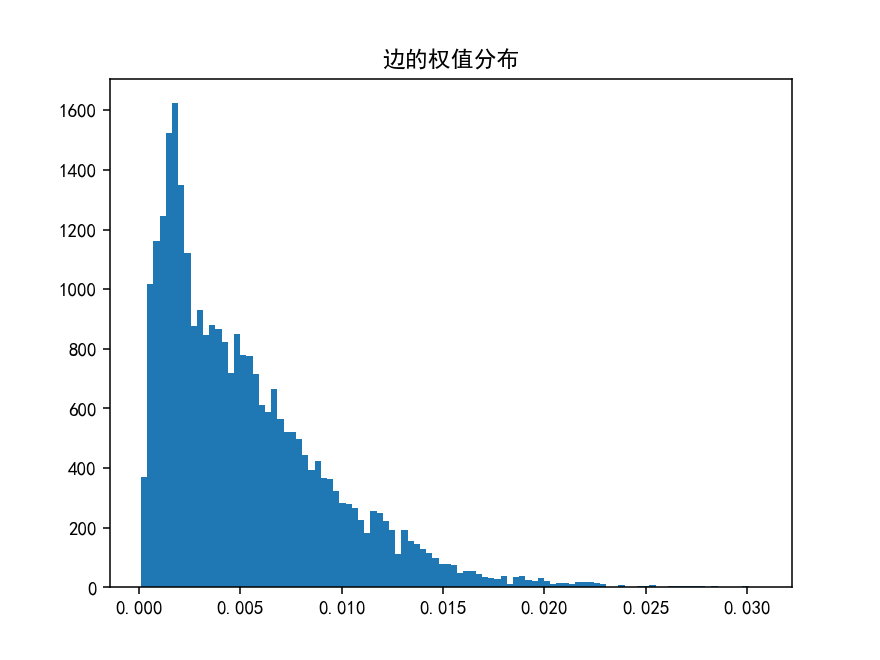

(array([ 370., 1016., 1162., 1246., 1523., 1623., 1348., 1122.,  878.,
         929.,  846.,  880.,  868.,  824.,  720.,  849.,  778.,  777.,
         717.,  613.,  589.,  664.,  565.,  521.,  520.,  497.,  445.,
         393.,  424.,  366.,  362.,  322.,  282.,  280.,  266.,  227.,
         182.,  255.,  248.,  223.,  194.,  113.,  194.,  154.,  145.,
         128.,  116.,   97.,   79.,   78.,   76.,   47.,   55.,   56.,
          45.,   35.,   32.,   27.,   37.,   10.,   36.,   38.,   24.,
          20.,   31.,   20.,   13.,   16.,   14.,   12.,   19.,   19.,
          18.,   15.,   11.,    0.,    2.,    8.,    3.,    3.,    4.,
           5.,    7.,    2.,    2.,    6.,    6.,    4.,    4.,    4.,
           4.,    2.,    6.,    0.,    2.,    2.,    2.,    4.,    0.,
           2.]),
 array([0.00010391, 0.00040969, 0.00071546, 0.00102124, 0.00132702,
        0.00163279, 0.00193857, 0.00224435, 0.00255013, 0.0028559 ,
        0.00316168, 0.00346746, 0.00377323, 0.00407901, 0.00438479

In [14]:
a = disMat.flatten()
plt.title('边的权值分布');
plt.hist(a[a.nonzero()],bins=100)

## 建图

In [15]:
G = nx.Graph()

In [16]:
G.add_nodes_from(range(nodeMat.shape[0]))

In [17]:
edges = []
for i,(neighbors,distances) in enumerate(zip(nodeMat,disMat)):
    edges +=[(i, neighbors[j], distances[j]) for j in range(k+1) if neighbors[j]!=i]
print(edges[:5])

[(0, 7206, 0.010830732800692664), (0, 49, 0.011818959810406333), (0, 1, 0.01199689459818665), (0, 64, 0.013389309840316665), (1, 67, 0.010321521447926208)]


In [18]:
G.add_weighted_edges_from(edges)

In [19]:
print('node size',len(G.nodes))

node size 7207


### 3D

<IPython.core.display.Javascript object>


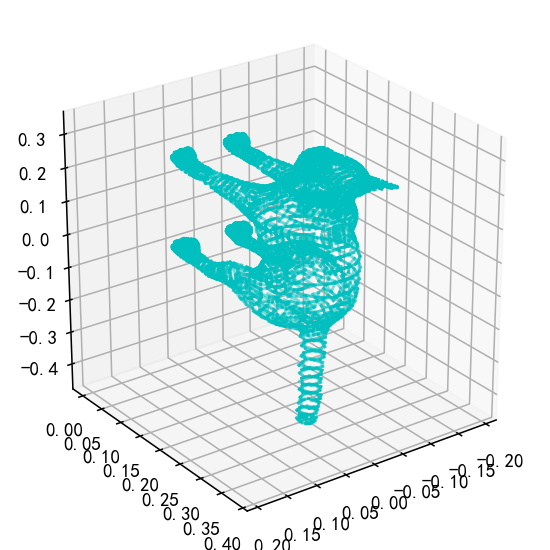

(-0.08029670000000001,
 0.07838270000000001,
 -0.018174350000000002,
 0.40128535000000004)

In [22]:
fig = plt.figure(figsize=(4,4))
ax = Axes3D(fig)
# ax.scatter3D(*data.to_numpy().T,marker='.')
for a,b,_ in edges:
    if np.random.rand()>0.5:
        ax.plot(*data.iloc[[a,b]].to_numpy().T,alpha=0.5,color='c')
ax.axis('equal')

### plain

In [22]:
# plt.figure(figsize=(8,8))
# pos = nx.spring_layout(G)
# nx.draw(G,node_shape='o',pos=pos,node_size=30,node_color='c',edge_color='#A0CBE2')

## 投票

https://networkx.github.io/documentation/stable/reference/algorithms/shortest_paths.html

In [23]:
#dis = dict(nx.all_pairs_bellman_ford_path_length(G))

In [24]:
# with open('disMat','w') as f:
#     f.write(str(N)+'\n')
#     for i in range(N):
#         for j in range(N):
#             try:
#                 d = dis[i][j]
#             except KeyError:
#                 d = -1
#             f.write(str(d)+' ')

In [25]:
# del dis

仅作为参考，现在使用c实现这一部分
```
nodeIdx = list(range(N))
samples = 50000
subSamples = 10000
th = 0.01
conditon = lambda a,b,c,d:abs(dis[a][b]-dis[c][d])<th and abs(dis[a][d]-dis[b][c])<th

votes = defaultdict(int)

for i in range(samples):
    a,b,c,d=np.random.choice(nodeIdx,4)
    if conditon(a,b,c,d):
        for j in range(subSamples):
            e,f = np.random.choice(nodeIdx,2)
            if conditon(a,b,e,f) and conditon(c,d,e,f):
                if b>a:
                    a,b=b,a
                if d>c:
                    c,d=d,c
                votes[(a,b)]+=1
                votes[(c,d)]+=1
```

In [22]:
a = np.loadtxt('./out.txt')
votes = defaultdict(int)
for i,j in zip(a.nonzero()[0],a.nonzero()[1]):
    v = a[i,j]
    assert v>0
    if i==j:continue
    if i<j:
        i,j=j,i
    votes[(i,j)] += v
del a

In [23]:
votes

defaultdict(int,
            {(6244, 23): 2.0,
             (2040, 165): 12.0,
             (2913, 232): 12.0,
             (1050, 281): 6.0,
             (2813, 288): 16.0,
             (5883, 294): 6.0,
             (2857, 327): 6.0,
             (2697, 378): 16.0,
             (2546, 445): 6.0,
             (2159, 458): 2.0,
             (3735, 925): 6.0,
             (976, 406): 2.0,
             (2107, 1002): 3.0,
             (5980, 1049): 26.0,
             (5004, 1225): 2.0,
             (6873, 1348): 8.0,
             (4495, 1429): 6.0,
             (5589, 1506): 48.0,
             (1508, 998): 2.0,
             (1695, 1530): 2.0,
             (3494, 1634): 6.0,
             (1663, 1220): 6.0,
             (6392, 1682): 15.0,
             (4545, 1762): 2.0,
             (1776, 1577): 15.0,
             (5914, 1790): 26.0,
             (3859, 1813): 18.0,
             (1825, 1120): 2.0,
             (1854, 1849): 224.0,
             (1928, 46): 24.0,
             (3635, 1970): 

<IPython.core.display.Javascript object>


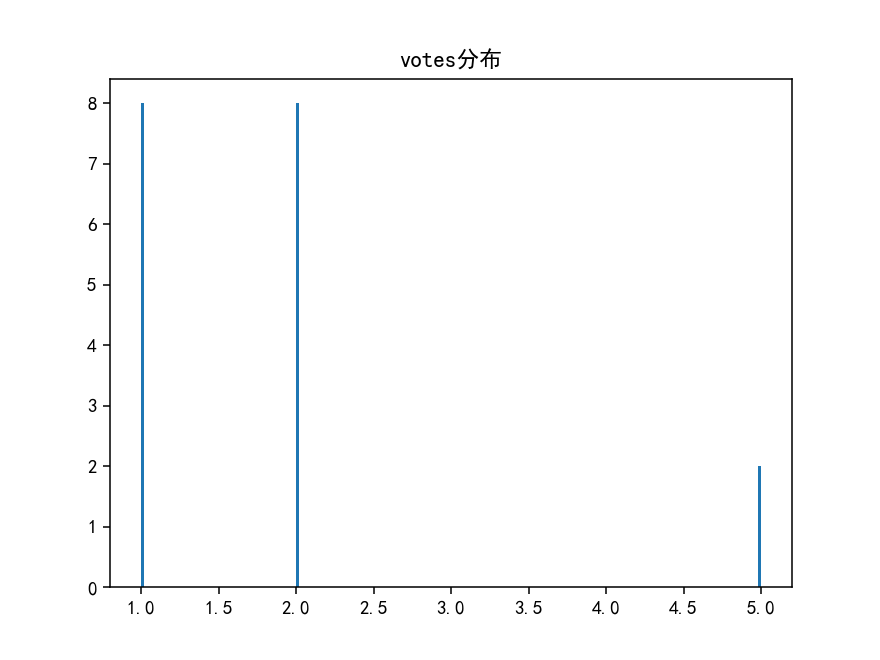

(array([8., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 8.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([1.  , 1.02, 1.04, 1.06, 1.08, 1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 ,
        1.22, 1.24, 1.26, 1.

In [25]:
# plt.xlim((0,50))
plt.title('votes分布')
plt.hist(votes.values(),bins=200)

In [34]:
next(nx.all_pairs_bellman_ford_path(G))[1][7206]

[0, 7206]

### 对于较小的图使用以下代码得nodeSet

In [35]:
# path = dict(nx.all_pairs_bellman_ford_path(G))

**设定votes的阈值**

In [ ]:
# th_votes = 8000

In [ ]:
# nodeSet = set()
# for a,b in votes.keys():
#     pi = path[a][b]
#     if votes[(a,b)]>th_votes:
#         nodeSet.add(pi[len(pi)//2])
# print('len of nodeSet:',len(nodeSet))
# print(nodeSet)

In [ ]:
# del path

### 对于较大的图使用以下代码得nodeSet
来减少内存消耗

In [24]:
th_votes = 0

In [25]:
voteDict = defaultdict(list)
for a,b in votes.keys():
    if votes[(a,b)]>th_votes:
        voteDict[b].append(a) # 使 key <= value
print('len of voteDict',len(voteDict))
print(voteDict)

len of voteDict 115
defaultdict(<class 'list'>, {23: [6244], 165: [2040], 232: [2913], 281: [1050], 288: [2813], 294: [5883], 327: [2857], 378: [2697], 445: [2546], 458: [2159], 925: [3735, 2041], 406: [976], 1002: [2107], 1049: [5980], 1225: [5004], 1348: [6873], 1429: [4495], 1506: [5589], 998: [1508], 1530: [1695], 1634: [3494], 1220: [1663], 1682: [6392], 1762: [4545], 1577: [1776], 1790: [5914], 1813: [3859], 1120: [1825], 1849: [1854], 46: [1928], 1970: [3635], 1988: [5902], 2002: [2014], 2022: [2551], 2037: [4665], 2042: [3989], 988: [2102], 2253: [3511], 2294: [2295], 2435: [6788], 2137: [2440], 2456: [3872], 2474: [6773], 2508: [3579], 2517: [5532], 2536: [3013], 224: [2546], 96: [2553], 2579: [2714], 59: [2698], 2700: [6242], 1709: [2831], 2852: [3115], 862: [2913], 567: [2969], 1292: [3027], 3099: [3424, 4197], 3139: [5563], 1992: [3220], 3475: [6150], 870: [3486], 3493: [7038], 383: [3559], 3640: [4171], 1735: [3766], 2114: [3790], 1935: [3797], 2927: [3998], 3056: [4032], 

In [26]:
nodeSet = set()
for i in voteDict.keys():
    for b in voteDict[i]:
        pi = nx.dijkstra_path(G,i,b)
        nodeSet.add(pi[len(pi)//2])
print('len of nodeSet:',len(nodeSet))
print(nodeSet)

len of nodeSet: 78
{2310, 2182, 2312, 1673, 2314, 5258, 4234, 1289, 2446, 526, 1040, 2186, 274, 2323, 2324, 1429, 1430, 1303, 3224, 281, 1306, 532, 1044, 2328, 5150, 543, 164, 6053, 676, 3111, 6184, 3340, 3370, 684, 557, 432, 5171, 949, 311, 2999, 1209, 953, 5014, 829, 1982, 1213, 1853, 1215, 2878, 1349, 1352, 3147, 459, 2255, 1104, 594, 855, 272, 3165, 3294, 4958, 1376, 738, 613, 6118, 1382, 2024, 749, 750, 239, 4080, 1393, 2187, 2184, 2295, 3707, 636, 6270}


## 构建子图

### 3D

<IPython.core.display.Javascript object>


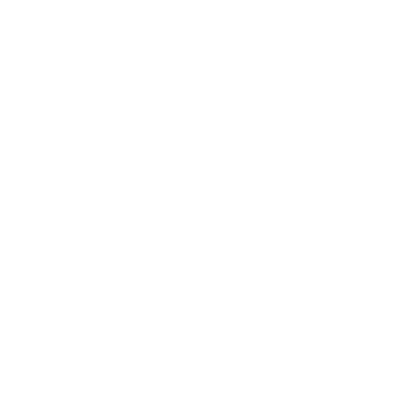

(-0.08029670000000001,
 0.07838270000000001,
 -0.018174350000000002,
 0.40128535000000004)

In [92]:
fig = plt.figure(figsize=(4,4))
ax = Axes3D(fig)
ax.scatter3D(*data.to_numpy().T,marker='.',color='c',alpha=0.5)
ax.scatter3D(*data.iloc[[*nodeSet]].to_numpy().T,marker='.',s=30,color='r')
ax.axis('equal')

In [40]:
G2 = G.subgraph(nodeSet)
edgeSet = G2.edges() # not set actually

<IPython.core.display.Javascript object>


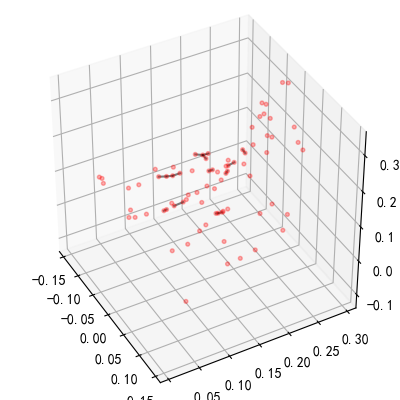

(-0.06702435000000001, 0.06755734999999999, -0.006898400000000002, 0.3085904)

In [91]:
fig = plt.figure(figsize=(4,4))
ax = Axes3D(fig)
# ax.scatter3D(*data.to_numpy().T,marker='.',color='c',alpha=0.5)
ax.scatter3D(*data.iloc[[*nodeSet]].to_numpy().T,marker='.',s=30,color='r',alpha=0.3)
for a,b in edgeSet:
    if np.random.rand()>-1:
        ax.plot(*data.iloc[[a,b]].to_numpy().T,alpha=0.5,color='k')
ax.axis('equal')

### plain

**在原图位置上展示**

In [42]:
G2 = G.subgraph(nodeSet)

<IPython.core.display.Javascript object>


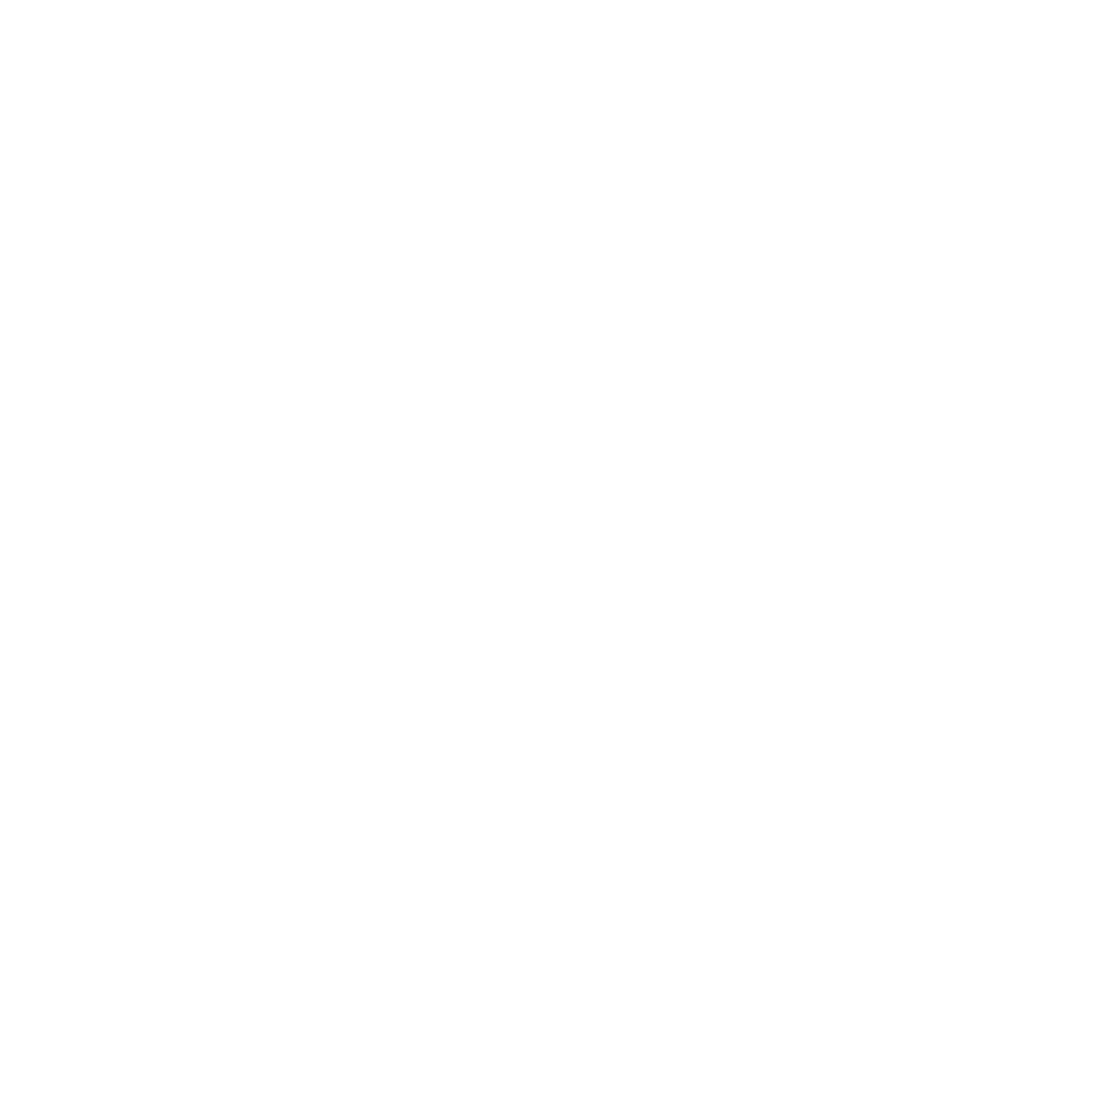

NameError: name 'pos' is not defined

In [44]:
plt.figure(figsize=(8,8))
nx.draw(G,node_shape='o',pos=pos,node_size=30,node_color='c' ,edge_color='#A0CBE2')
nx.draw(G2,node_shape='o',pos=pos, node_size=30,width=2)

**使用图布局算法(Fruchterman-Reingold force-directed algorithm)**

事实上默认就是用了图布局算法的

<IPython.core.display.Javascript object>


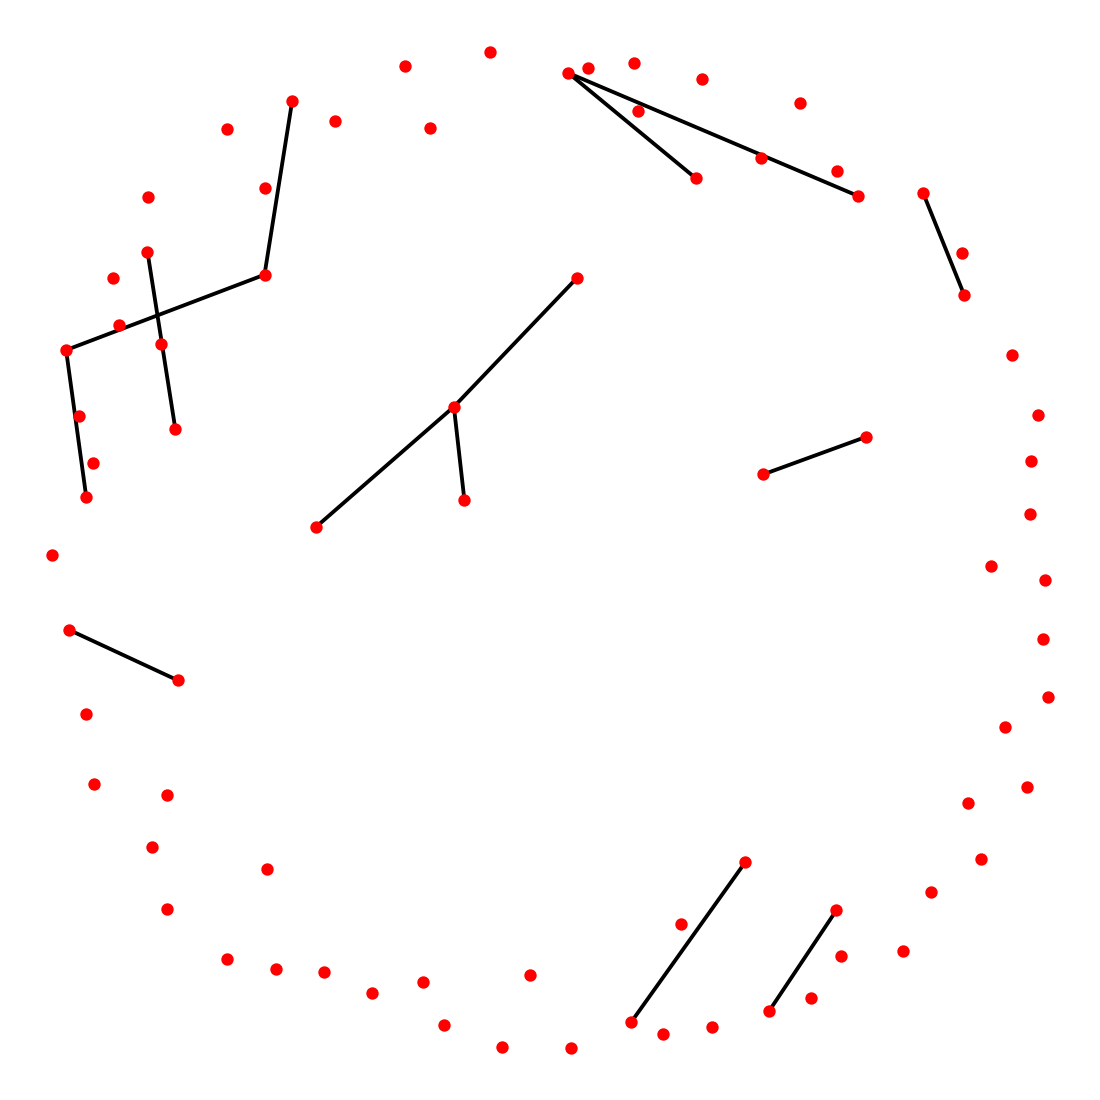

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [28]:
plt.figure(figsize=(8,8))
nx.draw(G2,node_shape='o',node_size=30,width=2)

## 对提取的结点绘制knn图

In [45]:
subData = data.iloc[list(nodeSet),:]
print("length of subData :",len(subData))
subData.head()

length of subData : 78


,0,1,2
2310,-0.030638,0.125481,0.155022
2182,-0.034279,0.153135,0.188639
2312,-0.031208,0.090921,0.164912
1673,0.051452,0.027691,0.187359
2314,-0.030078,0.103083,0.159762


**设定k**

In [102]:
k =4

In [103]:
# a = preprocessing.normalize(data.values)
b = subData.values

In [104]:
neigh = NearestNeighbors(n_neighbors=k+1) # 因为之后提取最近点时会包括点自身
neigh.fit(b)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [105]:
disMat,nodeMat = neigh.kneighbors(b)

In [106]:
G3 = nx.Graph()

In [107]:
edges = []
for i,(neighbors,distances) in enumerate(zip(nodeMat,disMat)):
    edges +=[(i, neighbors[j], distances[j]) for j in range(k+1) if neighbors[j]!=i]
print(edges[:5])

[(0, 14, 0.0118583097446474), (0, 4, 0.02290090836626354), (0, 13, 0.02341826861661639), (0, 53, 0.02728455154478447), (1, 73, 0.010995809610938163)]


In [108]:
G3.add_weighted_edges_from(edges)

<IPython.core.display.Javascript object>


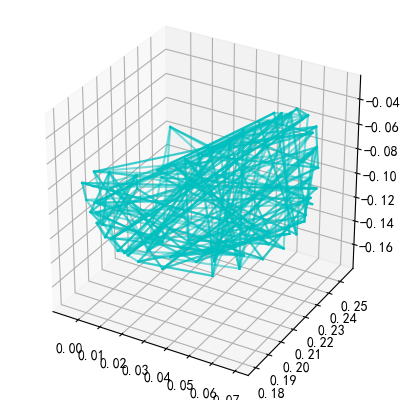

(-0.00330455, 0.06726155, 0.1758862, 0.2597238)

In [110]:
fig = plt.figure(figsize=(4,4))
ax = Axes3D(fig)
# ax.scatter3D(*data.to_numpy().T,marker='.')
for a,b,_ in edges:
    if np.random.rand()>0.:
        ax.plot(*data.iloc[[a,b]].to_numpy().T,alpha=0.5,color='c')
ax.axis('equal')

<IPython.core.display.Javascript object>


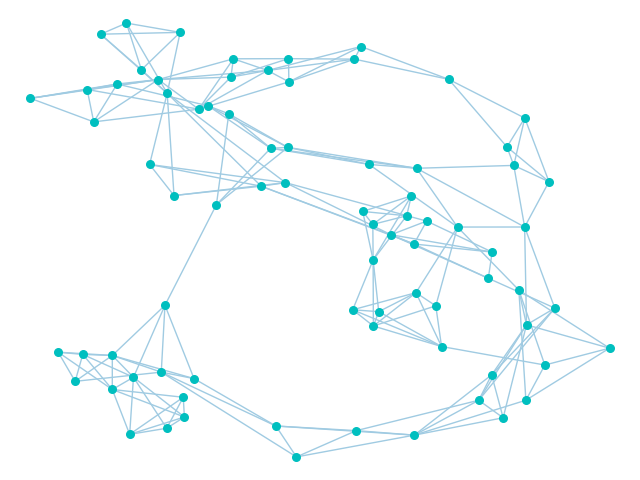

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [113]:
plt.figure()
nx.draw(G3,node_shape='o',node_size=30,node_color='c',edge_color='#A0CBE2')